#### Poverty Definition
- According to World Bank poverty means living on less than 1.90 dollars/day in undeveloped countries, or less than 69 dollars/day with a family of four in the US. There are 780 million people in the world living under this threshold. They have unsafe drinking water, no access to education, sanitation, and have a short life expectancy.
- Most developing countries are inadequate and out-of-date data. If governments want to meet the needs of their poor citizens, they need to know where they live and what their needs are. Today, extreme poverty is mostly in Africa, 27 out of 28 poorest countries are on Africa continent
- To ensure that 780 million poor people can escape poverty requires largly on donation,and the operation of non-profit organization around the globe.
- https://www.globalcitizen.org/en/content/10-things-to-do-to-end-extreme-poverty-by-2030/
- https://www.un.org/en/sections/issues-depth/poverty/
##### Kiva overview:
Kiva is an international non-profit organization that allows people to lend money over the internet to low-income entrepreneurs and students over 80 countries. Kiva has crowd-funded more than 1.6 million loans, over 1.33 billion dollars,with a repayment rate of 96%. Over 1.8 million lenders worldwide use the Kiva platform.
Kiva has a network of field partners to administer the loan on the ground. To apply for Kiva, each borrower must     submit an application, and a personal stories telling why he/she needs a loan.
Kiva doesn't impose any interests. This organization is supported by grants, loans, and donations from its users,     corporations, and national instititutions.
"We envision a financially inclusive world where all people hold the power to improve their lives." (https://www.kiva.org/about)
    
#####  Problem statement:
In reaching out to browers that need loans in the regions that Kiva is active, this organization needs localized      models to identify the location and estimate the poverty of residents in order to grand a loan.

#### Data Understanding
#####  Datasets:
There are two datasets utilizing in this research. The first four datasets are from Kiva organization, the second one is obtained from one of kaggle contributors. 
#####  Data Descriptions:
- id: Unique ID for loan
- funded_amount: The amount disbursed by Kiva to the field agent(USD)
- loan_amount: The amount disbursed by the field agent to the borrower(USD)
- activity: More granular category
- sector: High level category
- use: Exact usage of loan amount
- country_code: ISO country code of country in which loan was disbursed
- country: Full country name of country in which loan was disbursed
- region: Full region name within the country
- currency: The currency in which the loan was disbursed
- partner_id: ID of partner organization
- posted_time: The time at which the loan is posted on Kiva by the field agent
- disbursed_time: The time at which the loan is disbursed by the field agent to the borrower
- funded_time: The time at which the loan posted to Kiva gets funded by lenders completely
- term_in_months: The duration for which the loan was disbursed in months
- lender_countThe total number of lenders that contributed to this loan
tags
- borrower_genders: Comma separated M,F letters, where each instance represents a single male/female in the group
- repayment_interval:
- date:
- region: Region with in country
- world_region: Parts of the world
- MPI: Multidimensional poverty index
- geo(latitude, longitude)
- lat: Latitude
- lon: Longitude
- Loan Theme ID: ID for Loan Theme
- Loan Theme Type: Category name of type of loan
- Partner ID
- Field Partner Name
- for Kiva
- geocode_old

#### Data Cleaning & EDA
##### Loading Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid")

#####  Loading data
##### Loading Kiva loans data

In [2]:
loans_kv_df = pd.read_csv('kiva-crowdfunding/kiva_loans.csv')
print(loans_kv_df.shape)
loans_kv_df.head()

(671205, 20)


,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


In [3]:
loans_kv_df.dropna().head(2)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
6,653067,200.0,200.0,Dairy,Agriculture,To purchase a dairy cow and start a milk produ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:51:02+00:00,2013-12-16 08:00:00+00:00,2014-01-01 17:18:09+00:00,43.0,8,"user_favorite, user_favorite",female,bullet,2014-01-01


#### Plot Loan Amount vs Country
- When you are lenders, two things that you should consider before granting a loan. 
    - First: the amount of loan requesting by borrowers
    - Second: Loan description (what borrowers want to do with the loans)
- Let sum up the amount of loan per country, and sort them in descending order
- Then use Plotly World Choropleth Map offline in Python to display the results
- https://plot.ly/python/v3/choropleth-maps/
- https://stackoverflow.com/questions/52990452/plotly-world-choropleth-map-offline-in-python
- https://plot.ly/pandas/choropleth-maps/

In [3]:
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

countries_loan_amnt = loans_kv_df.groupby('country').sum()['loan_amount'].sort_values(ascending = False)
data = [dict(
        type='choropleth',
        locations= countries_loan_amnt.index,
        locationmode='country names',
        z=countries_loan_amnt.values,
        text=countries_loan_amnt.index,
        colorscale = [[0,'rgb(120, 252, 120)'],[1,'rgb(180, 140, 247)']],
        reversescale=True,
        marker=dict(line=dict(width=0.7)),
        colorbar=dict(autotick=False, tickprefix='', title='Loan Amount'),
)]
layout = dict(title = 'Loan Amount by Country', 
        geo = dict(
            showframe = False, 
            showcoastlines = True, 
            projection = dict(type = 'Mercator')),
            margin = dict(t=50, b=30, l=10, r=10))
fig = dict(data=data, layout=layout)
iplot(fig, validate=False, filename='Total-Loan-map')

- The regions that are shaded with color from light green to  purple are the countries that borrow money from Kiva. Green indicates heavily amount of loan. Philipine , Kenya, USA, Peru, Paraguay are the top five country on the list of Kiva borrowers with loan amount of 55.34, 34.53,31.49,30.86, and 29.62 million dollars respectively.
- It is intersting to know that USA is one of many Kiva borrowers
- Note that Kiva loans are embeded mostly in African Continent, Asia, and South America
- Note: use computer cursor to hover over the country; country's name and the loan amount will show up.

#####  Plot Number of Borrowers Per Activities, Sectors, Countries, & Regions
- Now let's see what these loans are used for, the number of loans for each sector, and where are the requesters (national, and subnational)
    - Count the number of loans for each activity and display the first 20 most use of loans
    - Count the number of loans per each sector and display the results
    - Count the number of loans per each country/regions and display the first 20 countries/regions with the most borrowers
    

Text(0, 0.5, 'Number of Borrowers')

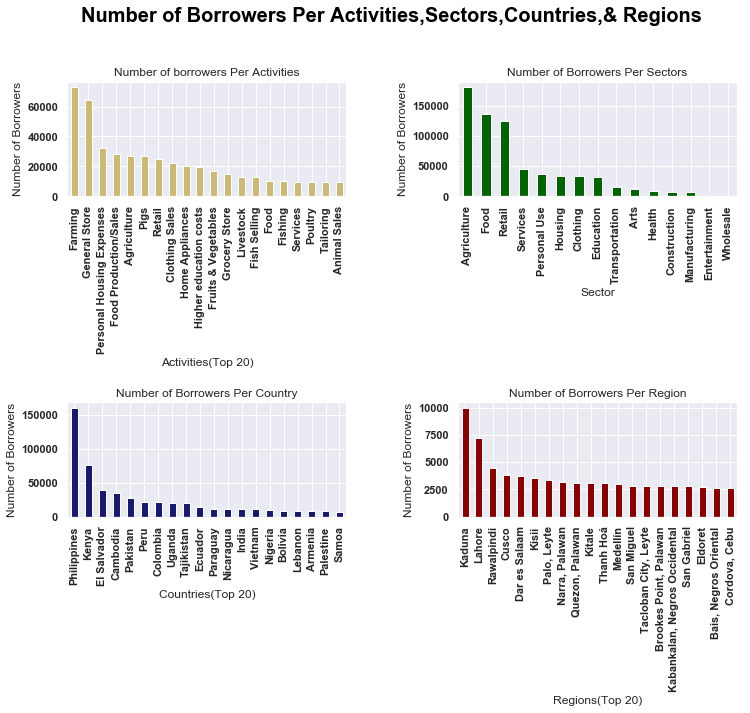

In [5]:
fig = plt.figure()

plt.rcParams['figure.figsize'] = [22,12]
plt.rcParams["font.weight"] = "bold"

fontdict={'fontsize': 18,'weight' : 'bold'}

fontdicty={'fontsize': 14,'weight' : 'bold','verticalalignment': 'baseline','horizontalalignment': 'center'}

fontdictx={'fontsize': 14, 'weight' : 'bold','horizontalalignment': 'center'}

plt.subplots_adjust(wspace=0.4, hspace=1.8)

fig.suptitle('Number of Borrowers Per Activities,Sectors,Countries,& Regions', fontsize=20,fontweight="bold", color="black", 
             position=(0.5,1.01))

ax1 = fig.add_subplot(221)
loans_kv_df['activity'].value_counts().head(20).plot('bar', color='y', ax=ax1)
ax1.set_title('Number of borrowers Per Activities')
plt.xlabel('Activities(Top 20)')
plt.ylabel('Number of Borrowers')

ax2 = fig.add_subplot(222)
loans_kv_df['sector'].value_counts().plot('bar', color ='darkgreen', ax=ax2)
ax2.set_title('Number of Borrowers Per Sectors')
plt.xlabel('Sector')
plt.ylabel('Number of Borrowers')

ax3 = fig.add_subplot(223)
loans_kv_df['country'].value_counts().head(20).plot('bar', color='midnightblue',ax=ax3)
plt.title('Number of Borrowers Per Country')
plt.xlabel('Countries(Top 20)')
plt.ylabel('Number of Borrowers')

ax4 = fig.add_subplot(224)
loans_kv_df['region'].value_counts().head(20).plot('bar', color='darkred',ax=ax4)
plt.title('Number of Borrowers Per Region')
plt.xlabel('Regions(Top 20)')
plt.ylabel('Number of Borrowers')

In [11]:
loans_kv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 20 columns):
id                    671205 non-null int64
funded_amount         671205 non-null float64
loan_amount           671205 non-null float64
activity              671205 non-null object
sector                671205 non-null object
use                   666973 non-null object
country_code          671197 non-null object
country               671205 non-null object
region                614405 non-null object
currency              671205 non-null object
partner_id            657698 non-null float64
posted_time           671205 non-null object
disbursed_time        668809 non-null object
funded_time           622874 non-null object
term_in_months        671205 non-null float64
lender_count          671205 non-null int64
tags                  499789 non-null object
borrower_genders      666984 non-null object
repayment_interval    671205 non-null object
date                  671205 non

- The plots show that most loans are used for farming, general store, personal housing expenses, produce food/sale food ( buy and sale food, retailers, open daily market..), raise pigs, making and selling clothes...
- For sector, agriculture comes first in the number of loans, then food, retail, services, and personal use in that order. Not suupprisinglly that health sector is in its 11 place.
- In term of country, Phillipines, Kenya, El Salvador, Cambodia, Pakistan are the first five countries that have the most number of loans.
- Also note that regions with most numbers of borrowers are in African Continent (keep that in mind while we are trying to locate countries that are developing countries (poverty) 

##### Plot Loan_Amount Distribution
- Let see the amount of loan for each borrower.
- Distribution of amount of loan help to identify hidden poverty. If borrowers only borrow 50, 100, 200 dollars from some non-profit organization like Kiva, these borrowers are ,indeed, in critical needs.

Text(0, 0.5, 'Number of Loans')

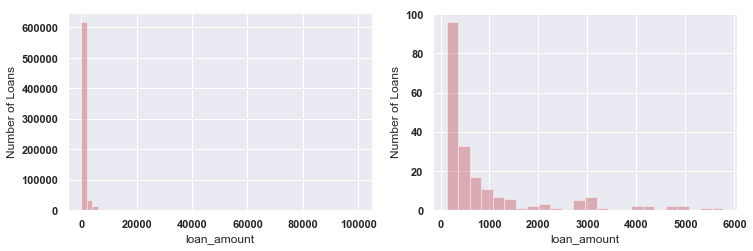

In [7]:
fig = plt.figure()

plt.rcParams['figure.figsize'] = [12,8]

ax1 = fig.add_subplot(221)
sns.distplot(loans_kv_df['loan_amount'], kde=False, color='r')
plt.ylabel('Number of Loans')
# since the loan amount is so small compare to the number of borrowers, the general distribution plot doesn't help
# Plot the first 200 of loan amount will give better visualization of how the amounts are distributed
ax1 = fig.add_subplot(222)
sns.distplot(loans_kv_df['loan_amount'][:200], kde=False, color='r')
plt.ylabel('Number of Loans')

In [8]:
print('Loan Minimum:',loans_kv_df['loan_amount'].min())
print('Loan Maximum:',loans_kv_df['loan_amount'].max())

Loan Minimum: 25.0
Loan Maximum: 100000.0


- The min & max amount Kiva has so far lent to borrowers are 25 and 100,000 dollars respectively.

##### Plot the  Total number of Borrowers vs Countries  &  Total Amount of Loans vs Countries

- Use groupby method to group 'country' & 'loan_amount'. First sum up the total amount loans for each country, then sort them out in descending order. After that print out the top 20 countries with the most amount of loans.
- Then plot side by side plot of 'Countries vs Number of Loans' and plot of 'Countries vs Total Amount of Loans'
- The purpose is to find out if there is any relationship between amount of borrowers and the amount of loans for each country (whether it is a propotional relationship or inverse relationship

Text(0.5, 1.0, 'Loan Amount Per Country-(Millions)')

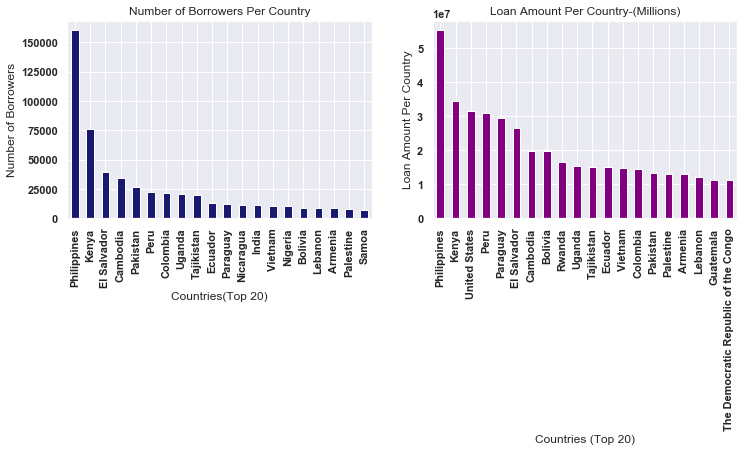

In [9]:
fig = plt.figure()

plt.rcParams['figure.figsize'] = [12,8]
plt.rcParams["font.weight"] = "bold"

fontdict={'fontsize': 25,
          'weight' : 'bold'}

ax1 = fig.add_subplot(221)
loans_kv_df['country'].value_counts().head(20).plot('bar', color='midnightblue',ax=ax1)
plt.title('Number of Borrowers Per Country')
plt.xlabel('Countries(Top 20)')
plt.ylabel('Number of Borrowers')


ax2 = fig.add_subplot(222)
loans_kv_df.groupby('country').sum()['loan_amount'].sort_values(ascending=False).head(20).plot('bar',color='purple', ax=ax2)
plt.xlabel('Countries (Top 20)')
plt.ylabel('Loan Amount Per Country')
plt.title('Loan Amount Per Country-(Millions)')

- Philipines and Kenya are still leading in term of number of loans and total amount of loans. However, USA doesn't come up in the third 20 of countries with the large number of borrowers, but it comes up third in term of borrowers with higher loan amount. Which can be infered that for such countries with such statistics loans are not used for basic living such as food, water, housing..etc.. 

#### Plot Loan Uses based on Sector Disection
- What do borrowers use loan money for? At a household/individual level? A deep disect into 'sector' parts to understand the utility of these loans at microborrow level.
- Then using Wordcloud to display the nine selected sectors.
- https://www.tutorialspoint.com/create-word-cloud-using-python

In [10]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [8]:
#loading all necessary libraries
import numpy as np
import pandas as pd
import string
import collections
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline

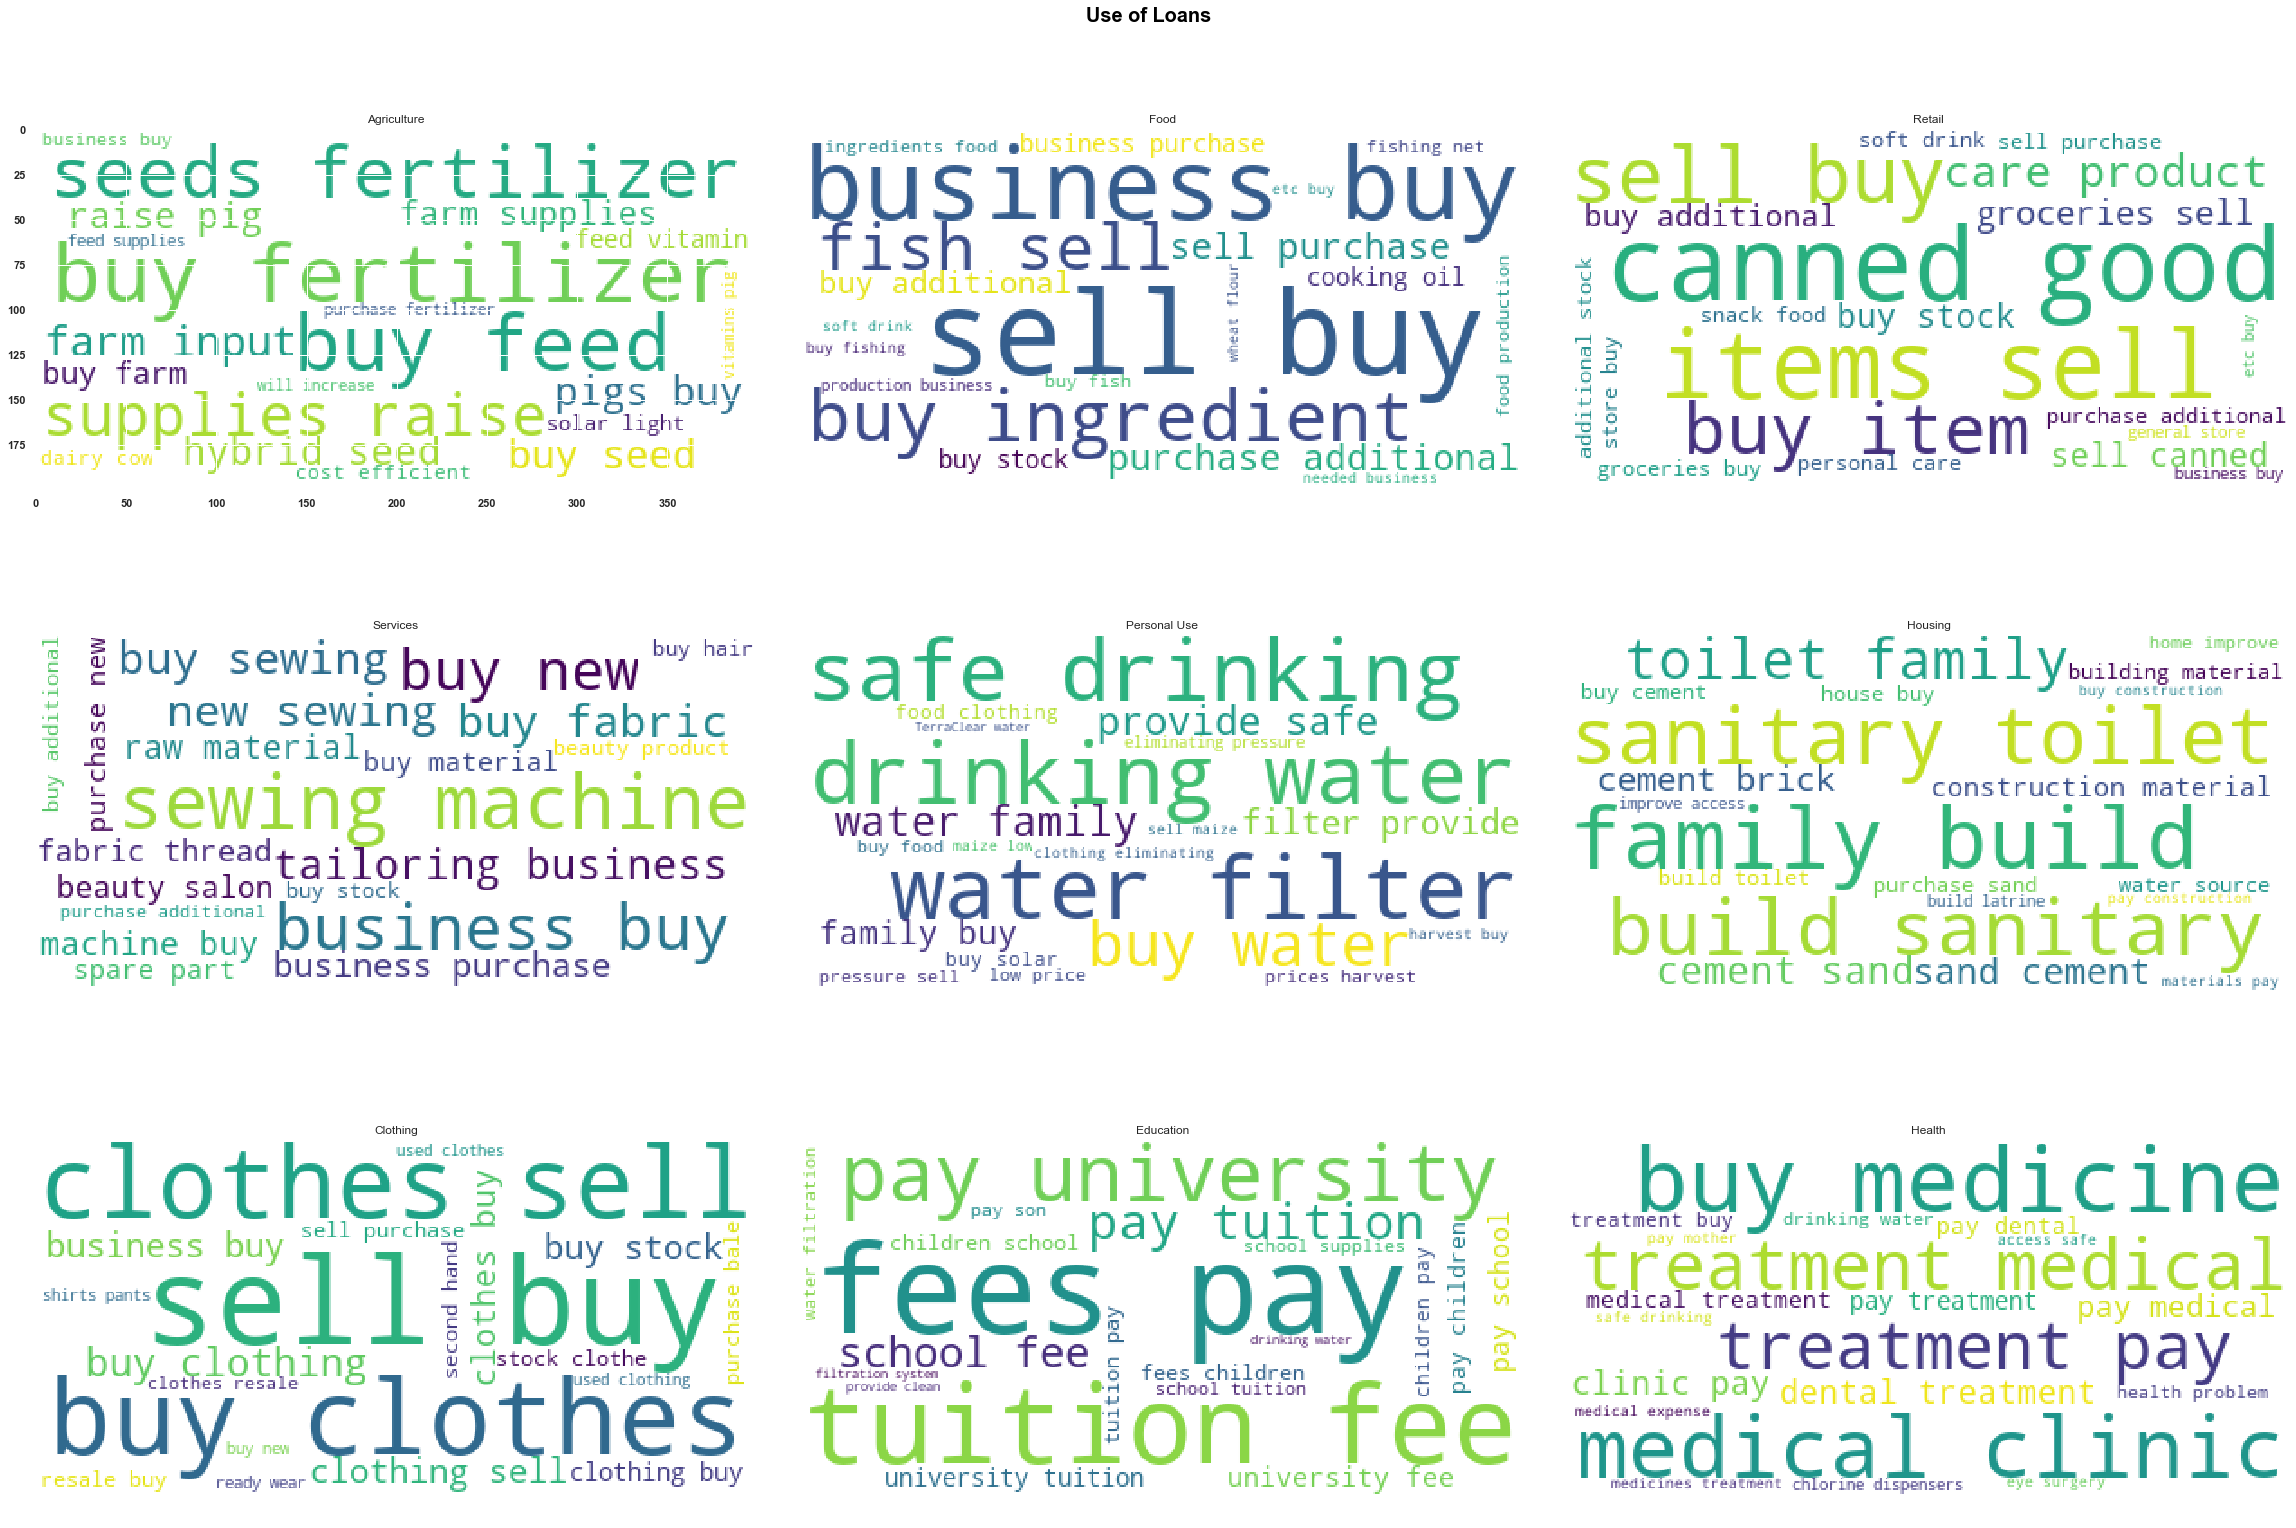

In [11]:
# Create framework figure size, fontsize, title location
fig = plt.figure()

plt.rcParams['figure.figsize'] = [32,22]
plt.rcParams["font.weight"] = "bold"

fontdict={'fontsize': 25,'weight' : 'bold'}

fontdicty={'fontsize': 18,'weight' : 'bold','verticalalignment': 'baseline','horizontalalignment': 'center'}

fontdictx={'fontsize': 18, 'weight' : 'bold','horizontalalignment': 'center'}

plt.subplots_adjust(wspace=0.2, hspace=0.2)

fig.suptitle('Use of Loans', fontsize=20,fontweight="bold", color="black",position=(0.5,1.01))

# Create 6 subplots for 6 different use of loan in term of sector
ax1 = fig.add_subplot(331)
wc = WordCloud(background_color='white',
    stopwords=STOPWORDS,max_words=20).generate(" ".join(loans_kv_df[loans_kv_df['sector'] == 'Agriculture'].use.astype(str)))
plt.title('Agriculture')
plt.imshow(wc)
plt.title('Agriculture')

ax2 = fig.add_subplot(332)
wc = WordCloud(background_color='white', stopwords=STOPWORDS,max_words=20).generate(" ".join(loans_kv_df[loans_kv_df['sector'] == 'Food'].use.astype(str)))
plt.title('Food')
plt.imshow(wc)
plt.axis('off')

ax3 = fig.add_subplot(333)
wc = WordCloud(background_color='white', stopwords=STOPWORDS,max_words=20).generate(" ".join(loans_kv_df[loans_kv_df['sector'] == 'Retail'].use.astype(str)))
plt.title('Retail')
plt.imshow(wc)
plt.axis('off')

ax4 = fig.add_subplot(334)
wc = WordCloud(background_color='white', stopwords=STOPWORDS,max_words=20).generate(" ".join(loans_kv_df[loans_kv_df['sector'] == 'Services'].use.astype(str)))
plt.title('Services')
plt.imshow(wc)
plt.axis('off')

ax5 = fig.add_subplot(335)
wc = WordCloud(background_color='white', stopwords=STOPWORDS,max_words=20).generate(" ".join(loans_kv_df[loans_kv_df['sector'] == 'Personal Use'].use.astype(str)))
plt.title('Personal Use')
plt.imshow(wc)
plt.axis('off')

ax6 = fig.add_subplot(336)
wc = WordCloud(background_color='white', stopwords=STOPWORDS,max_words=20).generate(" ".join(loans_kv_df[loans_kv_df['sector'] == 'Housing'].use.astype(str)))
plt.title('Housing')
plt.imshow(wc)
plt.axis('off')

ax6 = fig.add_subplot(337)
wc = WordCloud(background_color='white', stopwords=STOPWORDS,max_words=20).generate(" ".join(loans_kv_df[loans_kv_df['sector'] == 'Clothing'].use.astype(str)))
plt.title('Clothing')
plt.imshow(wc)
plt.axis('off')

ax6 = fig.add_subplot(338)
wc = WordCloud(background_color='white', stopwords=STOPWORDS,max_words=20).generate(" ".join(loans_kv_df[loans_kv_df['sector'] == 'Education'].use.astype(str)))
plt.title('Education')
plt.imshow(wc)
plt.axis('off')

ax6 = fig.add_subplot(339)
wc = WordCloud(background_color='white', stopwords=STOPWORDS,max_words=20).generate(" ".join(loans_kv_df[loans_kv_df['sector'] == 'Health'].use.astype(str)))
plt.title('Health')
plt.imshow(wc)
plt.axis('off')

plt.tight_layout()

- Going from left to right, and from row to row in order of most borrowers to the least, most of loans are used to sell and buy materials. They are used to buy hybrid seeds, farm supplies, raise pigs,buy groceries, softdrink, cooking oil,... or buy solar lights, buy fabric, sewing machine.
- For personal use, most loans are used to buy safe drinking water which indicate regions/countries that are inadequate of living standard,and need to be further investigated. Under housing sector, most loans are used to by sand ,cement, water source, brick, or building materials. These all are basic needed for human at a elementary level, for survival mode, not comforting.Keep that in mind for further investigating.
- Education and health sectors fall far behind in number of borrowers doesn't mean that they aren't important. To survive, one need food, water, shelters; selling and buying provide that basic needs. Education comes before healthcare in the same reason. Higher education means more money, more food.. Poor people delay healthcare until they are in critical needs for treatments, mostly for dental and clinic visits

#### Plot Gender vs Number of Borrowers
- Note that Kiva datasets are survey datasets. The way participants fill out the survey forms tell a lot about their educational background.
- Since there are so many gender-based group of borrowers. It is best to create a function called 'cat_gender' and pass the argument 'borrower_genders' as input variable to produce output variables of male, female, male and female, and unkown group.
- Let see what gender is the most asking for loans

In [13]:
# create categorical gender
def cat_gender(borrower_genders):
    if type(borrower_genders) is float and np.isnan(borrower_genders):
        return 'Unknown'
    gender_list = list(set(borrower_genders.split(",")))
    male_count = sum(borrower_genders.strip() == 'male' for borrower_genders in gender_list)
    female_count = sum(borrower_genders.strip() == 'female' for borrower_genders in gender_list)
    
    if(male_count > 0 and female_count > 0):
        return "MF"
    elif(female_count > 0):
        return "F"
    elif (male_count > 0):
        return "M"
    else:
        return "Unknown"  
    
# call the function and apply to borrower_genders attribute
loans_kv_df.borrower_genders = loans_kv_df.borrower_genders.apply(cat_gender)    

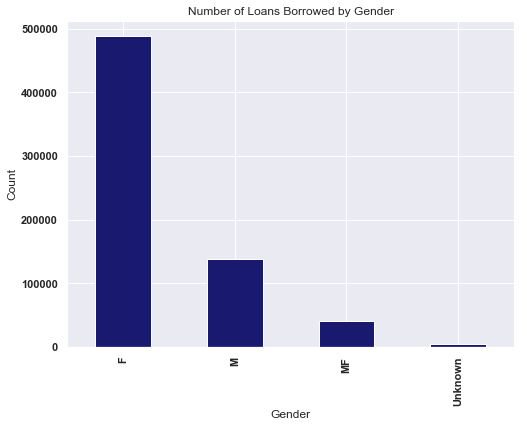

In [14]:
# plot Gender vs Number of Loans
fig = plt.figure(figsize=(8,6))
loans_kv_df['borrower_genders'].value_counts().plot.bar(color='midnightblue')
plt.title('Number of Loans Borrowed by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

- Note that there are various group of genders in this dataset. Single female, single male requests for loan, group of female asks for loan. For simplicity, 4 groups are divided. The first group is called F (single Female). The second group is M (single male). There is also request for loan from both gender (family or business) which is not much. And the other group is labeled as unknown.
- Female lead in requesting for loan with almost 500,000 number of borrowers. This means that women are using Kiva to get funded. Most of them are from third world countries where male are dominant. Knowing this will have better understand of how Kiva loans have created positive impact in women's lives globlely.

#### Loading kiva_mpi_region_locations 
- Next, loading the MPI regions dataset that Kiva has provided, but first need to grab a concept of MPI.

- What is MPI?
    - Stands for Multidimentional Poverty Index
    - Created by United Nation Development Programme (UNDP)
    - Measures household and individually poverty levels in health, education, and standard of living.
    - Collects data from household surveys based on these three criterion
    - Used to create a comprehensive picture of people living in poverty
    - 2018 Statistical Update estimates 105 developing countries with a combination population of 5.7 billions
    - 1.3 billion people in countries around the world live in multidimensional Poverty.
  
  
- Three dimensions of Poverty (according to United Nations Development Programme (UNDP))
    1. Health: 
        - Nutrition: Undernourished for both adult and children
        - Child mortality: Any child has died in the family in the five year before the survey.
    2. Education: 
        - Years of schooling: No household member has completed six grade.
        - School attendance: Any school-aged child is not attending school up to the eight grader
    3. Standard of living:
        - Cooking fuel: Using dung, wood, charcoal or coal for cooking
        - Sanitation: Household'sanitation facility is not cleaned or be shared with other households
        - Drinking water: Household doesn't have access to safe drinking water, or water is far from home.
        - Electricity: Household has no electricity
        - Housing: Housing materials are made of natural or rudimentary materials such as clay,stone,leaves..
        - Assets: Household doesn't own more than one of these assets:
            - radio, TV, telephone, computer, bicycle, motorbike or refrigrator
            - and doesn't own a car or truck.
- How is MPI calculated? Each indicator account for 1/3. Health and education have two criterion that weighted equally 1/6. Standard of living has six indicators which weighted at 1/18 for each
- A person is considered poor if he/she is deprived in at least 1/3 of the weight indicators.
- If a household has weights that add up to MPI >=0.20, this household/person is considered poor (various MPI cutoff)
- http://hdr.undp.org/en/2018-MPI

In [8]:
import pandas as pd
mpi_kv_loc = pd.read_csv('kiva-crowdfunding/kiva_mpi_region_locations.csv')
mpi_kv_loc.head()

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538
2,"Baghlan, Afghanistan",AFG,Afghanistan,Baghlan,South Asia,0.300,"(35.8042947, 69.2877535)",35.804295,69.287754
3,"Balkh, Afghanistan",AFG,Afghanistan,Balkh,South Asia,0.301,"(36.7550603, 66.8975372)",36.755060,66.897537
4,"Bamyan, Afghanistan",AFG,Afghanistan,Bamyan,South Asia,0.325,"(34.8100067, 67.8212104)",34.810007,67.821210


- Check for missing value

In [9]:
mpi_kv_loc.isnull().sum()

LocationName    1788
ISO             1764
country         1764
region          1788
world_region    1764
MPI             1788
geo                0
lat             1880
lon             1880
dtype: int64

- More than 50% of missing value for every columns except for 'geo' feature. Drop missing value, display the first 5 rows and go with whatever data that we have.

In [10]:
mpi_kv_loc.dropna().head()

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538
2,"Baghlan, Afghanistan",AFG,Afghanistan,Baghlan,South Asia,0.300,"(35.8042947, 69.2877535)",35.804295,69.287754
3,"Balkh, Afghanistan",AFG,Afghanistan,Balkh,South Asia,0.301,"(36.7550603, 66.8975372)",36.755060,66.897537
4,"Bamyan, Afghanistan",AFG,Afghanistan,Bamyan,South Asia,0.325,"(34.8100067, 67.8212104)",34.810007,67.821210


##### Plot Kiva MPI data on the World Map

- let plot MPI data on the world map using groupby country and take the average MPI.
- Based on how MPI is calculated, one can infer that the higher the MPI, the poorer the country/people of that country in particularly region.

In [13]:
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
mpi_country = mpi_kv_loc.groupby('country')['MPI'].mean().reset_index()

data = [dict(
        type='choropleth',
        locations=mpi_kv_loc['country'],
        locationmode='country names',
        z=mpi_kv_loc['MPI'],
        colorscale=[[0,'rgb(120, 120, 252)'],[1,'rgb(140, 247, 200)']],
        reversescale=True,
        marker=dict(line=dict( width=0.5)),
        colorbar=dict(autotick=False, tickprefix='', title='MPI'))]

layout = dict(
    title = 'Average MPI per country',
    geo = dict(showframe=False, showcoastlines=True, projection=dict(type='Mercator')))

fig = dict(data=data, layout=layout)
iplot(fig, validate=False)

- Most countries with high MPI are located in the African Continent (middle), and that is not suprising. 
- Note here, even thought Philippines is the lead country with the most number of borrowers and the largest amount of loan, it actually has a very low MPI of 0.026, whereare Guinea,Chad, Sudan, and South Sudan are the most poorest countries (highest MPI) but they are not even on the list of 20 with the most borrowers and the largest amount of loans.
- It can be interpreted that in these underdeveloped or developing countries little money can be a big help, since they are poor and has little or no money to start. And as MPI increases, the ability to request loans of these people decreases. It could be lack of knowledge about loans and the application process, or they live in some exclusion areas, or field partners haven't reach out to these poor people yet.

#### Measuring Poverty using Proxy Means Test (PMT)
- What is Proxy Means Test (PMT)?
    - A test to estimate consumption when other income data isn't available or reliable. 
    - Results are used to determine the eligibility of a household/personal for goverment support/or fund
    - Using household characteristics to predict household welfare (consumption levels)
- PMT Methodology:
    - Collect household consumptions based on national consumption expenditure per capita data
    - Select poverty indicators based on household characteristics
    - Use multilinear regression model to estimate relationship between variable describing household characteristics and moneytary value of householde consumption
- PMT Model: 
    - National model
    - Cluster model
    - Urbanity model
https://www.unicef.org/socialpolicy/files/targeting-poorest.pdf
https://olc.worldbank.org/sites/default/files/1.pdf

#### Create Poverty Indicators Dataframe ( Poverty Indicators will use as predictors in the Prospective Model)

- Now that the concept of poverty and its indicators are known, and the countries with high MPI are identified. More relevant datasets regarding to poverty in these countries should be implemented involving health, education, and living standard in order to identified poverty entities.
- Data were obtained form different sources (Kaggel contributers, Word Data Bank: consumption.csv,household_size.csv,indicators.csv, mobile_ownership.csv,contry_stats.csv,world bank dataset, mpi_country dataframe (above cell)
- Let create a poverty indicators dataframe by upload these files and selectively merge them together.

In [14]:
# Household status: male_headship, household_size, and average number of children
df_house = pd.read_csv('household_size.csv',sep=';').round(2)
df_house.head()

,country,male_headship,average_household_size,avg_children_nb
0,Philippines,0.81,4.7,2.3
1,Kenya,0.68,3.9,2.6
2,El Salvador,0.65,4.1,2.1
3,Cambodia,0.73,4.6,2.0
4,Pakistan,0.89,6.8,3.2


In [15]:
# standard of living: ability to access water, sanitation, electricity, employment rate
df_indicators = pd.read_csv('indicators.csv',sep=';', decimal=',',encoding='latin1'). rename(columns={'country_name': 'country'}).round(2)
df_indicators = df_indicators.rename(columns ={'agriculture_employment_%,,,,,,,':'agriculture_employment_%'})
df_indicators=df_indicators.drop(columns=['country_code','population'], axis=1)
df_indicators.head()

,country,rural_population_%,access_water_%,access_sanitation_%,access_electricity_%,employment_%,agriculture_employment_%
0,Aruba,58.70,98.1,97.7,94.47,NaN,",,,"
1,Afghanistan,72.87,55.3,31.9,89.50,48.0,"61,59999847,,"
2,Angola,55.18,49.0,51.6,32.00,64.4,"4,199999809,,,"
3,Albania,41.62,95.1,93.2,100.00,43.4,"41,40000153,,"
4,Andorra,15.39,100.0,100.0,100.00,NaN,",,,,,,"


In [16]:
# Assets: mobile ownership
df_mobile = pd.read_csv('mobile_ownership.csv',sep=';',decimal=',',encoding='latin1').round(2)
df_mobile['mobile_per_100capita']= df_mobile['mobile_per_100capita'].astype('float')
df_mobile.head()

,country,mobile_per_100capita
0,Philippines,99.25
1,Kenya,71.45
2,El Salvador,142.02
3,Cambodia,127.74
4,Pakistan,64.69


In [17]:
# education: years of schooling
df_edu = pd.read_csv('country_stats.csv')[['country_name','mean_years_of_schooling']].rename(columns={'country_name':'country'}).round(2)
df_edu.head()

,country,mean_years_of_schooling
0,India,6.30
1,Nigeria,6.00
2,Mexico,8.55
3,Pakistan,5.09
4,Bangladesh,5.24


In [19]:
# Merge all necessary datasets
new_df = pd.merge(df_indicators,df_house, how ='right', on = 'country')
new_df = pd.merge(new_df, df_mobile, how='left', on ='country')
pov_indicators = pd.merge(new_df, df_edu, how='left', on ='country').round(2)
pov_indicators.drop(columns ='agriculture_employment_%',axis=1, inplace=True)
pov_indicators.dropna().head()

,country,rural_population_%,access_water_%,access_sanitation_%,access_electricity_%,employment_%,male_headship,average_household_size,avg_children_nb,mobile_per_100capita,mean_years_of_schooling
0,Armenia,37.44,100.0,89.5,100.00,52.3,0.71,3.8,1.7,108.50,11.29
1,Bolivia,31.09,90.0,50.3,90.04,70.7,0.77,3.5,2.3,92.26,8.20
2,Colombia,23.29,91.4,81.1,97.79,62.4,0.64,3.5,1.7,108.46,7.56
3,Ecuador,36.02,86.9,84.7,98.98,61.0,0.71,3.8,2.0,108.10,8.27
4,Ghana,45.32,88.7,14.9,78.30,72.6,0.66,3.5,2.4,103.92,6.94


#### Create a Correlation Heat Map
- Have a quick look at the relationships coefficients between two variables
- Summarize relationships among variables in the table
- Features selection will take place to build the PMT model
- https://seaborn.pydata.org/generated/seaborn.heatmap.html

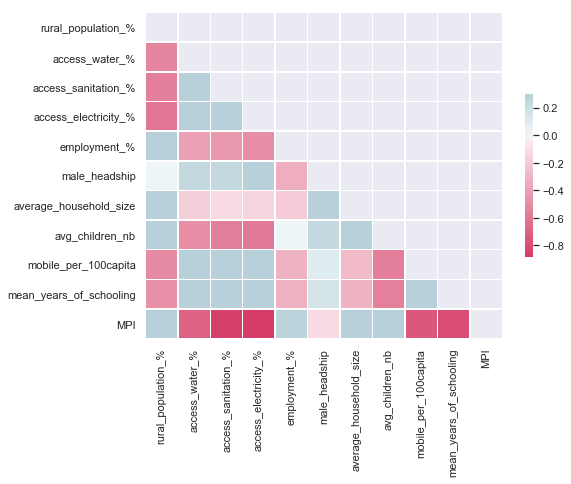

In [20]:
# merge poverty_indicators and mpi_country, and create a correlation heatmap to examine the relationship among these entities
pov_indicators_mpi = pd.merge(pov_indicators,mpi_country, how='inner', on='country')

# create the correlation heatmap
corr = pov_indicators_mpi.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, axs = plt.subplots(figsize=(8, 6))

cmap = sns.diverging_palette(1,222, as_cmap=True)

sns.heatmap(corr, mask=mask,cmap=cmap, vmax=.3,
            center=0, square=False,
            linewidths=.5, cbar_kws={"shrink": .5});

- There are strong inverse relationship between MPI and the ability to access to water, sanitation, electricity, mobile ownership, and years of schooling.
- There are also a strong inverse relationship between number of children per household and years of schooling, mobile ownership, acess to electricity,water, sanitation. The more children a household have the higher the MPI, and as consequences the poorer the household
- Male headship has no significant impact on other features.
- These indicators will be used as predictors in our prospective model

#### Loading Consumption Dataset ( Consumption Expenditure Per Capita will use as the Target Variable)
- The target variable for our model is household/personal consumption expenditure per capita
- Let see what is the consumption expenditure per capita:
    - Per capital consumption is an average consumption of a person/household in a particular country based on that nation consumption and population
- Dataset was obtained from another source on Kaggle.com
- https://en.wikipedia.org/wiki/List_of_countries_by_household_final_consumption_expenditure_per_capita
- https://fred.stlouisfed.org/series/A794RC0Q052SBEA

In [21]:
# load world bank dataset, then round the values to the tenth place decimal
# only select two columns from wb_cons.csv: country name and 2016 (consumption expenditure per capita values for 2016)
# rename the columns after feature selection
# drop nan values
import pandas as pd
df_consumption = pd.read_csv('wb_cons.csv').round(2)
df_consumption = df_consumption[['Country Name', '2016']]
df_consumption = df_consumption.rename(columns={'Country Name':'country','2016':'consumption_capita'})
df_consumption.dropna().head()
                                                

,country,consumption_capita
1,Afghanistan,509.46
3,Albania,3569.31
5,Arab World,3066.68
6,United Arab Emirates,22119.83
7,Argentina,6941.30


#### Create DataFrame for Poverty Indicator Model
- Let merge indicators dataframe and personal consumption expenditure per capita
- And rename the columns with % title to percentage

In [22]:
df = pd.merge(pov_indicators,df_consumption,how='left', on='country').round(2).dropna()
df = df.rename(columns={'rural_population_%':'rural_population_percent',
                       'access_water_%':'access_water_percent',
                       'access_sanitation_%':'access_sanitation_percent',
                       'access_electricity_%':'access_electricity_percent',
                       'employment_%':'employment_percent'})
df.head()

,country,rural_population_percent,access_water_percent,access_sanitation_percent,access_electricity_percent,employment_percent,male_headship,average_household_size,avg_children_nb,mobile_per_100capita,mean_years_of_schooling,consumption_capita
0,Armenia,37.44,100.0,89.5,100.00,52.3,0.71,3.8,1.7,108.50,11.29,2702.41
1,Bolivia,31.09,90.0,50.3,90.04,70.7,0.77,3.5,2.3,92.26,8.20,1502.89
2,Colombia,23.29,91.4,81.1,97.79,62.4,0.64,3.5,1.7,108.46,7.56,4652.42
3,Ecuador,36.02,86.9,84.7,98.98,61.0,0.71,3.8,2.0,108.10,8.27,2985.84
5,Guatemala,47.97,92.8,63.9,85.49,60.4,0.75,4.8,2.4,147.44,6.30,2730.09


#### PMT Modeling

In [30]:
from sklearn import datasets, linear_model
from statsmodels.formula.api import ols

# Define the predictors and dependent variable
result = 'consumption_capita'
x_cols=['male_headship','average_household_size',
        'avg_children_nb','rural_population_percent',
        'access_water_percent','access_sanitation_percent',
        'access_electricity_percent','employment_percent',
        'mobile_per_100capita','mean_years_of_schooling']
# Build the model
predictors = '+'.join(x_cols)
formula = result + '~' + predictors
model= ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     consumption_capita   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     5.923
Date:                Tue, 01 Oct 2019   Prob (F-statistic):           0.000568
Time:                        09:04:26   Log-Likelihood:                -235.79
No. Observations:                  29   AIC:                             493.6
Df Residuals:                      18   BIC:                             508.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   3858.0007   3335.688      1.157      0.263   -3150.021    1.09e+04
male_headship               -189.8017   3266.839     -0.058      0.954   -7053.175    6673.572
average_household_size      -337.5828    554.640     -0.609      0.550   -1502.839     827.673
avg_children_nb              205.2353    950.036      0.216      0.831   -1790.716    2201.187
rural_population_percent     -50.1441     17.473     -2.870      0.010     -86.854     -13.434
access_water_percent          14.5564     31.482      0.462      0.649     -51.585      80.697
access_sanitation_percent     14.1361     19.761      0.715      0.484     -27.380      55.653
access_electricity_percent    -1.3186     18.150     -0.073      0.943     -39.450      36.812
employment_percent            -6.1155     26.537     -0.230      0.820     -61.868      49.637
mobile_per_100capita           1.0601     10.376      0.102      0.920     -20.738      22.859
mean_years_of_schooling       28.3583    167.199      0.170      0.867    -322.914     379.631
==============================================================================
Omnibus:                        4.678   Durbin-Watson:                   1.773
Prob(Omnibus):                  0.096   Jarque-Bera (JB):                3.068
Skew:                           0.553   Prob(JB):                        0.216
Kurtosis:                       4.147   Cond. No.                     3.13e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- This is our initial model, p-values are high except rural_population_percent (p_value=0.01)
- There are multicolinearity
- Small datasize
- Let run the second model with selective independent features

In [31]:
model2 = ols(formula = 'consumption_capita ~ rural_population_percent+employment_percent + male_headship',
          data = df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     consumption_capita   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     18.82
Date:                Tue, 01 Oct 2019   Prob (F-statistic):           1.34e-06
Time:                        09:10:32   Log-Likelihood:                -239.78
No. Observations:                  29   AIC:                             487.6
Df Residuals:                      25   BIC:                             493.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 5809.0607   2218.921      2.618      0.015    1239.107    1.04e+04
rural_population_percent   -75.5615     11.942     -6.327      0.000    -100.157     -50.966
employment_percent          -3.0761     21.704     -0.142      0.888     -47.777      41.625
male_headship               94.8914   2337.024      0.041      0.968   -4718.299    4908.081
==============================================================================
Omnibus:                        1.578   Durbin-Watson:                   2.103
Prob(Omnibus):                  0.454   Jarque-Bera (JB):                0.546
Skew:                           0.193   Prob(JB):                        0.761
Kurtosis:                       3.551   Cond. No.                     1.37e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
model3 = ols(formula = 'consumption_capita ~ rural_population_percent+access_sanitation_percent+mobile_per_100capita+average_household_size ',
          data = df).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:     consumption_capita   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     19.06
Date:                Tue, 01 Oct 2019   Prob (F-statistic):           3.60e-07
Time:                        09:10:44   Log-Likelihood:                -236.19
No. Observations:                  29   AIC:                             482.4
Df Residuals:                      24   BIC:                             489.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

- After running three different models,mode3 is the better model with improvement in both R-squared and p_values
- It shows a strong inverse relationship between rural_population and consumption per capita(52 times)
- The other predictors don't have significant impacts on household/personal consumption per capita

#### DHS Cluster
- Up to this point, all relevant Kiva datasets has been explored and analyzed. A regression model has been built based on demographic information and take the countries's data as input,under the concept of proxy means test methodology.Predict household welfare (consumption levels) based on household characteristics : household size, belonging possessions, living standards, education..

- What is DHS Cluster?
    - DHS stands for Demographic & Health Survey
    - When researcher(s) can't get info of a population as a whole, he/she may compile data from different sources at different regions. This way cluster can be more economical and practical. However, cluster sampling must be heterogeneous, mutual exclusive, and representation of the entire population.
    - Hence, DHS Clusters are samples collected form different regions of a country where poverty is presented
- Using data collected from a cluster, will allow us access to boundary geographic regions information, investigate, and suggest ways to help indentifier regions that are in needs goverment assistants/funds.
- This dataset was obtained from Kosmowski posted on Kaggle.com
 https://www.kaggle.com/fkosmowski/kivadhsv1/downloads/kivadhsv1.zip/11

#### Create DHS.Cluster DataFrame

In [5]:
from sklearn.preprocessing import StandardScaler

clusters = pd.read_csv('DHS.clusters.csv')
# get rid off the duplicates
clusters= clusters.drop_duplicates()[['DHSCLUST','DHSCC.x', 'DHS.lat', 'DHS.lon','Country','MPI.median', 'Nb.HH', 'AssetInd.median','URBAN_RURA',
                    'Nb.Electricity', 'Nb.fuel', 'Nb.floor', 'Nb.imp.sanitation', 'Nb.imp.water', 'Median.educ', 'Nb.television', 'Nb.phone']]
clusters.drop(clusters.index[4987],inplace=True)
# using list comprehension to assign value in 'Country' & convert datatype for latitude and longitude as float
clusters['Country']=[clusters['Country'].iloc[i] if clusters['DHSCC.x'].iloc[i] !='AM' else 'ARM' for i in range(len(clusters))]
clusters[['DHS.lat', 'DHS.lon']] = clusters[['DHS.lat', 'DHS.lon']].astype(float,inplace=True)
# convert to percentage/ratio for some selected features (indicators) 
for ind in ['Nb.Electricity','Nb.fuel','Nb.floor','Nb.imp.sanitation','Nb.imp.water','Nb.television','Nb.phone'] : 
    clusters[ind]=round(100*clusters[ind].astype(int)/clusters['Nb.HH'].astype(int),2)
# using apply method combine with lambda to label values in 'urban_rura' with 0 and 1    
clusters['URBAN_RURA']=clusters['URBAN_RURA'].apply (lambda x : 1 if x=='U' else 0 )

clusters['DHSCLUST']=[str(clusters['DHSCLUST'].iloc[i])+'_'+clusters['Country'].iloc[i] for i in range(len(clusters))]
# convert data type of attribute 'AssetInd.median' to float
# set max and min for AssetInd.median
clusters['AssetInd.median']=clusters['AssetInd.median'].astype(float)
max_asset = max(clusters['AssetInd.median'])
min_asset = min(clusters['AssetInd.median'])
clusters['AssetInd.median']=clusters['AssetInd.median'].apply(lambda x : round((100/(max_asset-min_asset)) * (x-min_asset),2))
 #rename columns
clusters.rename(columns={"MPI.median":"MPI_cluster", "AssetInd.median" : "wealth_index", "URBAN_RURA": "urbanity" , 
                         'Nb.Electricity':'ratio_electricity','Nb.imp.sanitation':'ratio_sanitation',
                         'Nb.imp.water':'ratio_water', 'Nb.phone':'ratio_phone','Nb.floor':'ratio_nakedSoil',
                          'Nb.fuel':'ratio_cookingFuel','Nb.televison':'ratio_television'}, inplace=True)
# convert MPI_cluster to float
clusters['MPI_cluster']=clusters['MPI_cluster'].astype(float,inplace=True)
# Rescale the features using sklearn standardscaler
features =['urbanity' ,'ratio_sanitation','ratio_phone', 'ratio_electricity', 'ratio_cookingFuel', 'ratio_nakedSoil','ratio_water']
clusters[features]= StandardScaler().fit_transform(clusters[features])

clusters.head()

,DHSCLUST,DHSCC.x,DHS.lat,DHS.lon,Country,MPI_cluster,Nb.HH,wealth_index,urbanity,ratio_electricity,ratio_cookingFuel,ratio_nakedSoil,ratio_sanitation,ratio_water,Median.educ,Nb.television,ratio_phone
0,1_COL,CO,11.544571,-72.921327,COL,0.0,7,73.67,0.731433,-0.455233,-0.712197,-0.493856,-0.841506,-0.356097,0,100.0,0.864721
1,2_COL,CO,11.545763,-72.913614,COL,0.0,4,72.66,0.731433,-0.455233,-0.712197,-0.493856,-0.841506,-0.356097,0,100.0,1.393553
2,3_COL,CO,11.549456,-72.908101,COL,0.0,8,62.57,0.731433,-0.455233,-0.712197,-0.493856,-0.010832,-0.356097,0,100.0,0.283185
3,4_COL,CO,11.550513,-72.901499,COL,0.0,9,65.13,0.731433,-0.455233,-0.418447,-0.493856,-0.472355,0.165767,0,100.0,0.159712
4,5_COL,CO,11.542879,-72.919899,COL,0.0,8,66.28,0.731433,-0.455233,-0.712197,-0.493856,-0.841506,-0.356097,0,100.0,0.283185


In [8]:
clusters['Country'].value_counts()

COL    4987
PH      792
HT      445
ARM     308
KE      245
Name: Country, dtype: int64

#### Columbia Model

In [25]:
from sklearn import datasets, linear_model
from statsmodels.formula.api import ols
# Select country Columbia for our model
clusters_columbia = clusters[clusters['Country']=='COL']
# Define dependent and independent variables
target = 'MPI_cluster'
col_select = ['urbanity','ratio_sanitation','ratio_phone',
              'ratio_electricity','ratio_cookingFuel',
              'ratio_nakedSoil','ratio_water']
# Build the model
features_select = '+'.join(col_select)
formula = target + '~' + features_select
model_columbia = ols(formula=formula,data= clusters_columbia).fit()
model_columbia.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MPI_cluster   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     2585.
Date:                Tue, 01 Oct 2019   Prob (F-statistic):               0.00
Time:                        14:11:15   Log-Likelihood:                -15920.
No. Observations:                4987   AIC:                         3.186e+04
Df Residuals:                    4979   BIC:                         3.191e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            12.2308      0.094    129.786      0.000      12.046      12.416
urbanity             -0.9194      0.130     -7.075      0.000      -1.174      -0.665
ratio_sanitation      5.8050      0.137     42.243      0.000       5.536       6.074
ratio_phone          -0.8653      0.103     -8.382      0.000      -1.068      -0.663
ratio_electricity     1.8531      0.153     12.133      0.000       1.554       2.153
ratio_cookingFuel     3.7922      0.172     22.059      0.000       3.455       4.129
ratio_nakedSoil       3.0967      0.131     23.571      0.000       2.839       3.354
ratio_water           3.0077      0.089     33.831      0.000       2.833       3.182
==============================================================================
Omnibus:                      506.397   Durbin-Watson:                   1.811
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              814.015
Skew:                           0.734   Prob(JB):                    1.73e-177
Kurtosis:                       4.327   Cond. No.                         4.01
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Great!This is the best model that we have so far.R-squared = 0.78,all p-values =0.0 which indicate that all the variables in the model have no correlation with MPI_cluster, and changes in model variables are associated with changes in the MPI_cluster at the population level. 
- The coefficient value indicates how much the mean of the MPI changes given a one-unit shift in the variable while holding other variables constant.This allows assess the effect of each variable in isolation from the others. For instance, if the ratio_sanitation in the cluster increase in one unit, the MPI of that cluster will increase 5.8 times. When MPI of that cluster increase, it will alert government/loan field_partner to allot assistants in that cluster for that particular -sanitation purposes.In other hand,if urbantity increase one unit, the MPI of that cluster will decrease (~ 1unit), thus helps can be lifted from that cluster. 

#### Kenya Model

In [28]:
from sklearn import datasets, linear_model
from statsmodels.formula.api import ols
# Select country Columbia for our model
clusters_kenya = clusters[clusters['Country']=='KE']
# Define dependent and independent variables
target = 'MPI_cluster'
col_select = ['urbanity','ratio_sanitation','ratio_phone',
              'ratio_electricity','ratio_cookingFuel',
              'ratio_nakedSoil','ratio_water']
# Build the model
features_select = '+'.join(col_select)
formula = target + '~' + features_select
model_kenya = ols(formula=formula, data = clusters_kenya).fit()
model_kenya.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MPI_cluster   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     83.52
Date:                Tue, 01 Oct 2019   Prob (F-statistic):           1.81e-50
Time:                        14:15:29   Log-Likelihood:                -868.00
No. Observations:                 245   AIC:                             1748.
Df Residuals:                     239   BIC:                             1769.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.1436      0.540     -0.266      0.790      -1.207       0.920
urbanity             -0.2674      0.705     -0.380      0.705      -1.655       1.120
ratio_sanitation      6.3532      0.553     11.491      0.000       5.264       7.442
ratio_phone           0.1188      0.446      0.266      0.790      -0.761       0.998
ratio_electricity     0.9573      0.935      1.023      0.307      -0.885       2.800
ratio_cookingFuel     0.1023      0.384      0.266      0.790      -0.655       0.859
ratio_nakedSoil       4.5293      0.669      6.765      0.000       3.210       5.848
ratio_water           1.5980      0.404      3.959      0.000       0.803       2.393
==============================================================================
Omnibus:                       49.359   Durbin-Watson:                   1.529
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               80.409
Skew:                           1.119   Prob(JB):                     3.46e-18
Kurtosis:                       4.694   Cond. No.                     5.44e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.17e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### Kenya Model2

In [36]:
from sklearn import datasets, linear_model
from statsmodels.formula.api import ols
# Select country Columbia for our model
clusters_kenya = clusters[clusters['Country']=='KE']
# Define dependent and independent variables
target = 'MPI_cluster'
col_select = ['ratio_sanitation','ratio_nakedSoil','ratio_water']
# Build the model
features_select = '+'.join(col_select)
formula = target + '~' + features_select
model_kenya = ols(formula=formula, data = clusters_kenya).fit()
model_kenya.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MPI_cluster   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     138.9
Date:                Tue, 01 Oct 2019   Prob (F-statistic):           2.80e-52
Time:                        14:26:41   Log-Likelihood:                -868.80
No. Observations:                 245   AIC:                             1746.
Df Residuals:                     241   BIC:                             1760.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.2291      0.948      0.242      0.809      -1.637       2.096
ratio_sanitation     6.2864      0.550     11.436      0.000       5.204       7.369
ratio_nakedSoil      5.2347      0.346     15.127      0.000       4.553       5.916
ratio_water          1.7454      0.385      4.528      0.000       0.986       2.505
==============================================================================
Omnibus:                       52.054   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.547
Skew:                           1.134   Prob(JB):                     2.18e-20
Kurtosis:                       4.929   Cond. No.                         5.39
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Kenya Model2 is good fit for  Kenya; Changes in soil, water,and sanitation have significant changes in MPI cluster.

#### Philippines Model

In [6]:
from sklearn import datasets, linear_model
from statsmodels.formula.api import ols
# Select country Columbia for our model
clusters_philp = clusters[clusters['Country']=='PH']
# Define dependent and independent variables
target = 'MPI_cluster'
col_select = ['urbanity','ratio_sanitation','ratio_phone',
              'ratio_electricity','ratio_cookingFuel',
              'ratio_nakedSoil','ratio_water']
# Build the model
features_select = '+'.join(col_select)
formula = target + '~' + features_select
model_philp = ols(formula=formula, data = clusters_philp).fit()
model_philp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MPI_cluster   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     192.8
Date:                Wed, 02 Oct 2019   Prob (F-statistic):          1.08e-165
Time:                        11:04:44   Log-Likelihood:                -2228.0
No. Observations:                 792   AIC:                             4472.
Df Residuals:                     784   BIC:                             4509.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             5.5173      0.574      9.615      0.000       4.391       6.644
urbanity             -0.0854      0.183     -0.465      0.642      -0.446       0.275
ratio_sanitation      1.7074      0.278      6.145      0.000       1.162       2.253
ratio_phone          -0.1397      0.341     -0.409      0.682      -0.810       0.530
ratio_electricity     3.8534      0.222     17.396      0.000       3.419       4.288
ratio_cookingFuel     2.3338      0.273      8.537      0.000       1.797       2.870
ratio_nakedSoil       0.1675      0.296      0.565      0.572      -0.414       0.749
ratio_water           2.3447      0.255      9.204      0.000       1.845       2.845
==============================================================================
Omnibus:                      785.723   Durbin-Watson:                   1.587
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            33408.662
Skew:                           4.613   Prob(JB):                         0.00
Kurtosis:                      33.451   Cond. No.                         10.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Haiti Model

In [9]:
from sklearn import datasets, linear_model
from statsmodels.formula.api import ols
# Select country Columbia for our model
clusters_haiti = clusters[clusters['Country']=='HT']
# Define dependent and independent variables
target = 'MPI_cluster'
col_select = ['urbanity','ratio_sanitation','ratio_phone',
              'ratio_electricity','ratio_cookingFuel',
              'ratio_nakedSoil','ratio_water']
# Build the model
features_select = '+'.join(col_select)
formula = target + '~' + features_select
model_haiti = ols(formula=formula, data = clusters_haiti).fit()
model_haiti.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MPI_cluster   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     200.0
Date:                Wed, 02 Oct 2019   Prob (F-statistic):          5.87e-132
Time:                        11:13:36   Log-Likelihood:                -1623.6
No. Observations:                 445   AIC:                             3263.
Df Residuals:                     437   BIC:                             3296.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             5.8088      5.643      1.029      0.304      -5.281      16.899
urbanity             -2.1613      0.635     -3.403      0.001      -3.410      -0.913
ratio_sanitation      6.5957      0.653     10.098      0.000       5.312       7.879
ratio_phone          -4.8640      5.881     -0.827      0.409     -16.423       6.695
ratio_electricity     3.8086      0.572      6.653      0.000       2.683       4.934
ratio_cookingFuel     1.9380      2.271      0.853      0.394      -2.526       6.402
ratio_nakedSoil       4.3843      0.423     10.371      0.000       3.553       5.215
ratio_water           1.7471      0.630      2.774      0.006       0.509       2.985
==============================================================================
Omnibus:                        6.055   Durbin-Watson:                   1.905
Prob(Omnibus):                  0.048   Jarque-Bera (JB):                5.319
Skew:                          -0.198   Prob(JB):                       0.0700
Kurtosis:                       2.638   Cond. No.                         62.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Conclusion
- The first half of this research are dedicated to data cleaning and data mining using data provided by Kiva organization. And these are the discovery:
    - Philippines, Kenya, and United States are the three countries that owe large amount of money to Kiva (global visualization - first figure)
    - The minimum and maximum amount Kiva has lent to borrowers are 25 and 100,000 dollars respectively, most loan are less than 1,000 dollars
    - Philippines and Kenya also lead in largest number of borrowers. However, US doesn't show up in the first 20 countries with most borrwers
    - Most loans are divided in sector and distributed mostly in Agriculture (Farming),Food, Services, Retail, Personal Use, Education, Health in the order from most to least borrowers.
    - For Personal Use of Loans, most use for buying safe drinking water (povery?)
    - Women are the most borrowers from Kiva (75%) (in a male dominant culture?)
    - Continent that are poorest is Africa with MPI of 0.6/0.8 but least amount of loan and borrowers. (To end poverty globally, we need to focus on helping people in this continent)
- The second half is to grab the concept of MPI, Proxy Means Test to measure Poverty, search for relevant public data available, and construct a Granula Poverty Index Model
    - A naive regression Model is built to predict householde welfare based on household characteristics (at a national level)
    - A Granular Pover Index Model is built to predict MPI based on household characteristics (at a granular level)
    - Models are run and test on different countries such as Columbia and Kenya.
    - Note: Two regions may have the same MPI, but the reason of being poor may be different (Columbia vs Kenya Model)
    
#### Challenges
    - Lack of public data, inadequate data, not-up-to-date data
    - Time devoted for data cleaning and search for external data took large amount of time
    
####  Suggestions:
    - The 'Granular Poverty Index Model' is based on the concept of the 'Proxy Means Test'. It uses demographic information and takes MPI cluster as input. If time is allowed, we should construct a mathematical formula to calculate distance from longitudes and latitudes within a cluster. Combining demographic and geographic will give a comprehensive of the locations and the nature of needs of poor people which is the main purpose of this research.
    

- "There must have been some magic. In that Machine Learning we found. For when data placed in it.Things start dancing around"